# Проект: Линейные модели в машинном обучении aka Весёлый молочник

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial
import math
from matplotlib import pyplot
from decimal import Decimal
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import random

In [2]:
SEED = 0xDEAD
random.seed(SEED)
np.random.seed(SEED)

In [3]:
ferma_main = pd.read_csv('/Users/User/Downloads/ferma_main.csv', sep=';')
ferma_dad = pd.read_csv('/Users/User/Downloads/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('/Users/User/Downloads/cow_buy.csv', sep=';')

In [4]:
print(ferma_main.head())
print(ferma_dad.head())
print(cow_buy.head())

   id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  

# Промежуточный вывод

   1) Были открыты и просмотрены 3 csv файла, а именно: ferma_main.csv(указаны параметры корма коровы. СПО, порода, тип пастбища, порода папы быка, химические показатели молока коровы, его вкус и возраст), ferma_dad.csv(Имя папы), cow_buy.csv(где указаны порода, тип пастбища, порода папы быка, его имя и текущая жирность молока)
   
   2) При открытии файла было замечено что данные "слеплены" после чего с помощью **``sep=';'``** информация была разделена и всё привидено к читаемому виду

##  Предобработка данных

Проверим тип данных

In [5]:
ferma_main.info()
ferma_dad.info()
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

Заменим тип данных object на float в столбцах: ЭКЕ, СПО, Жирность,%, Белок,%, Текущая_жирность,%, Текущий_уровень_белок,%

In [6]:
ferma_main[['ЭКЕ (Энергетическая кормовая единица)', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']] = ferma_main[['ЭКЕ (Энергетическая кормовая единица)', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']].replace(',', '.', regex=True).astype('float')
cow_buy[['Текущая_жирность,%', 'Текущий_уровень_белок,%']] = cow_buy[['Текущая_жирность,%', 'Текущий_уровень_белок,%']].replace(',', '.', regex=True).astype('float')
print(ferma_main)
print(cow_buy)

      id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0      1      5863                                   14.2              1743   
1      2      5529                                   12.8              2138   
2      3      5810                                   14.0              1854   
3      4      5895                                   12.4              2012   
4      5      5302                                   12.8              1675   
..   ...       ...                                    ...               ...   
629  627      5970                                   14.4              1837   
630  627      5970                                   14.4              1837   
631  627      5970                                   14.4              1837   
632  627      5970                                   14.4              1837   
633  627      5970                                   14.4              1837   

     СПО (Сахаро-протеиновое соотношение)          

In [7]:
ferma_main.info()
ferma_dad.info()
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [8]:
print(ferma_main.isna().sum())
print(ferma_dad.isna().sum())
print(cow_buy.isna().sum())

id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64
id          0
Имя Папы    0
dtype: int64
Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
dtype: int64


In [9]:
print(ferma_main.isnull().sum())
print(ferma_dad.isnull().sum())
print(cow_buy.isnull().sum())

id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64
id          0
Имя Папы    0
dtype: int64
Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
dtype: int64


Пропусков нет

In [10]:
print(ferma_main.duplicated().sum())
print(ferma_dad.duplicated().sum())
print(cow_buy.duplicated().sum())

5
0
4


In [11]:
ferma_main = ferma_main.drop_duplicates()
cow_buy = cow_buy.drop_duplicates()
print(ferma_main.duplicated().sum())
print(ferma_dad.duplicated().sum())
print(cow_buy.duplicated().sum())

0
0
0


Теперь и дубликатов нет

# Новое

In [12]:
ferma_main['Тип пастбища'] = ferma_main['Тип пастбища'].replace(['Равнинное', 'Равнинные'], 'Равнинное')
ferma_main['порода папы_быка'] = ferma_main['порода папы_быка'].replace(['Айдиалл', 'Айдиал'], 'Айдиал')
ferma_main[['ЭКЕ (Энергетическая кормовая единица)', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']] = ferma_main[['ЭКЕ (Энергетическая кормовая единица)', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']].replace(',', '.', regex=True).astype('float')

In [13]:
X = ferma_main.drop(['Жирность,%', 'Белок,%', 'Вкус молока', 'Удой, кг'], axis=1)
y = ferma_main['Удой, кг']

In [14]:
from sklearn.model_selection import train_test_split



# разделите данные на тренировочные и тестовые, зафиксируйте random_state
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=SEED)

In [15]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)
cat_col_names = ['Порода', 'Тип пастбища',	'порода папы_быка',	'Возраст']
# обучите и трансформируйте категориальные признаки из тренировочной выборки
# сделайте это одной командой
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получите от кодировщика список новых столбцов и сохраните в новой переменной
encoder_col_names = encoder.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_col_names = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
print("Размерность матрицы обучающей выборки:", X_train.shape)
print("Размерность вектора целевого признака:", y_train.shape)
print("Размерность матрицы тестовой выборки:", X_test.shape)
print("Размерность вектора целевого признака:", y_test.shape)

Размерность матрицы обучающей выборки: (471, 8)
Размерность вектора целевого признака: (471,)
Размерность матрицы тестовой выборки: (158, 8)
Размерность вектора целевого признака: (158,)


In [18]:
# объединение всех преобразованных данных в тренировочный и тестовый датафреймы
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1).reset_index(drop=True)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1).reset_index(drop=True)
print("Размерность матрицы обучающей выборки:", X_train.shape)
print("Размерность вектора обучающей выборки:", y_train.shape)
print("Размерность матрицы тестовой выборки:", X_test.shape)
print("Размерность вектора тестовой выборки:", y_test.shape)
# вывести пять первых строк из тренировочного датафрейма
print(X_train.head(5))

Размерность матрицы обучающей выборки: (471, 11)
Размерность вектора обучающей выборки: (471,)
Размерность матрицы тестовой выборки: (158, 11)
Размерность вектора тестовой выборки: (158,)
   x0_Вис Бик Айдиал  x0_РефлешнСоверинг  x1_Равнинное  x1_Холмистое  \
0                0.0                 1.0           1.0           0.0   
1                1.0                 0.0           1.0           0.0   
2                0.0                 1.0           0.0           1.0   
3                1.0                 0.0           0.0           1.0   
4                1.0                 0.0           1.0           0.0   

   x2_Айдиал  x2_Соверин  x3_более_2_лет  x3_менее_2_лет  \
0        0.0         1.0             1.0             0.0   
1        0.0         1.0             1.0             0.0   
2        0.0         1.0             1.0             0.0   
3        1.0         0.0             1.0             0.0   
4        1.0         0.0             1.0             0.0   

   ЭКЕ (Энергетиче

In [19]:
from sklearn.linear_model import LinearRegression

model_lr_1 = LinearRegression()
model_lr_1.fit(X_train, y_train)
model_lr_1

LinearRegression()

In [20]:
from sklearn.metrics import mean_absolute_error

predictions = model_lr_1.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'MAE = {mae:.0f}')

MAE = 369


In [21]:
from sklearn.metrics import r2_score

# рассчитайте значения R2 для линейной регрессии
r2_lr = r2_score(y_test, predictions)

# выведите полученное значение R2
print("R2 LinearRegression =", r2_lr)

R2 LinearRegression = 0.12917300022050515


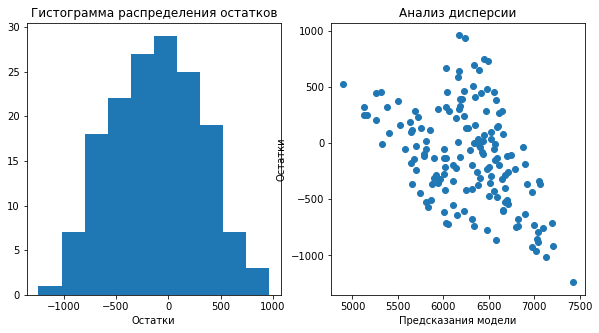

In [22]:
import matplotlib.pyplot as plt

residuals = y_test - predictions

# постройте графики по количественным признакам — гистограмму частотности
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

# Подпункт 2 шага 5 
Постройте модель линейной регрессии с учётом преобразования признаков, нелинейно связанных с целевым признаком

<AxesSubplot:title={'center':'Диаграмма рассеяния для величин СПО и удой'}, xlabel='Удой, кг', ylabel='СПО (Сахаро-протеиновое соотношение)'>

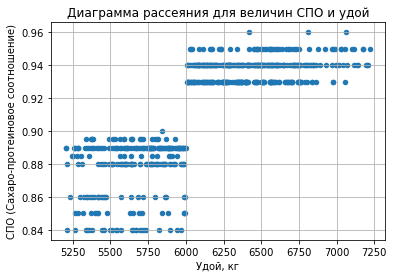

In [23]:
ferma_main[ferma_main['Удой, кг'] < 40000].plot(x='Удой, кг',
                y='СПО (Сахаро-протеиновое соотношение)',
                kind='scatter',
                grid=True,
                title = 'Диаграмма рассеяния для величин СПО и удой')

Граница нелинейности 0,91

In [24]:
ferma_main[ferma_main['СПО (Сахаро-протеиновое соотношение)'] < 0.91]

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
614,615,5741,12.9,1749,0.880,РефлешнСоверинг,Холмистое,Айдиал,3.44,3.076,вкусно,более_2_лет
623,624,5928,13.6,1832,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.077,не вкусно,более_2_лет
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [25]:
ferma_main['СПО (Сахаро-протеиновое соотношение)_бинарный'] = np.where(ferma_main['СПО (Сахаро-протеиновое соотношение)'] < 0.91, 0, 1)
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,СПО (Сахаро-протеиновое соотношение)_бинарный
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0


In [26]:
del ferma_main['СПО (Сахаро-протеиновое соотношение)']

In [27]:
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,СПО (Сахаро-протеиновое соотношение)_бинарный
0,1,5863,14.2,1743,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0
1,2,5529,12.8,2138,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0
2,3,5810,14.0,1854,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0
3,4,5895,12.4,2012,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0
4,5,5302,12.8,1675,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0


# Теперь ЭКЕ

<AxesSubplot:title={'center':'Диаграмма рассеяния для величин ЭКЕ и удой'}, xlabel='Удой, кг', ylabel='ЭКЕ (Энергетическая кормовая единица)'>

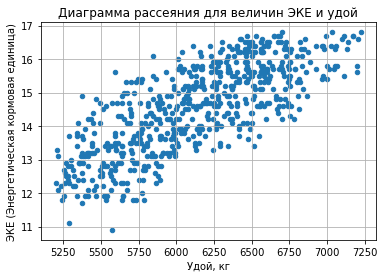

In [28]:
ferma_main[ferma_main['Удой, кг'] < 40000].plot(x='Удой, кг',
                y='ЭКЕ (Энергетическая кормовая единица)',
                kind='scatter',
                grid=True,
                title = 'Диаграмма рассеяния для величин ЭКЕ и удой')

Граница нелинейности ...

In [29]:
ferma_main['ЭКЕ в квадрате'] = ferma_main['ЭКЕ (Энергетическая кормовая единица)'] **2

In [30]:
del ferma_main['ЭКЕ (Энергетическая кормовая единица)']

In [31]:
ferma_main.head()

,id,"Удой, кг","Сырой протеин, г",Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,СПО (Сахаро-протеиновое соотношение)_бинарный,ЭКЕ в квадрате
0,1,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64
1,2,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84
2,3,5810,1854,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00
3,4,5895,2012,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76
4,5,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84


In [32]:
RANDOM_STATE = 42

# считываем CSV-файл в датафрейм pandas
# выделяем в отдельные переменные целевой признак и входные признак
X = ferma_main.drop(['Жирность,%', 'Белок,%', 'Вкус молока', 'Удой, кг'], axis=1)
y = ferma_main['Удой, кг']

In [33]:
from sklearn.model_selection import train_test_split



# разделите данные на тренировочные и тестовые, зафиксируйте random_state
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=SEED)

In [34]:
X_train

,id,"Сырой протеин, г",Порода,Тип пастбища,порода папы_быка,Возраст,СПО (Сахаро-протеиновое соотношение)_бинарный,ЭКЕ в квадрате
570,571,1936,РефлешнСоверинг,Равнинное,Соверин,более_2_лет,1,243.36
97,98,1985,Вис Бик Айдиал,Равнинное,Соверин,более_2_лет,1,228.01
531,532,1837,РефлешнСоверинг,Холмистое,Соверин,более_2_лет,0,207.36
58,59,2264,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,1,219.04
436,437,1949,Вис Бик Айдиал,Равнинное,Айдиал,более_2_лет,0,171.61
...,...,...,...,...,...,...,...,...
627,628,1994,РефлешнСоверинг,Равнинное,Соверин,более_2_лет,0,190.44
172,173,1710,Вис Бик Айдиал,Равнинное,Соверин,менее_2_лет,0,153.76
362,363,2041,Вис Бик Айдиал,Холмистое,Айдиал,более_2_лет,1,182.25
266,267,1717,РефлешнСоверинг,Холмистое,Айдиал,более_2_лет,1,237.16


In [35]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)
cat_col_names = ['Порода', 'Тип пастбища',	'порода папы_быка',	'Возраст']
# обучите и трансформируйте категориальные признаки из тренировочной выборки
# сделайте это одной командой
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получите от кодировщика список новых столбцов и сохраните в новой переменной
encoder_col_names = encoder.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_col_names = ['ЭКЕ в квадрате', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)_бинарный']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

In [37]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
print("Размерность матрицы обучающей выборки:", X_train.shape)
print("Размерность вектора целевого признака:", y_train.shape)
print("Размерность матрицы тестовой выборки:", X_test.shape)
print("Размерность вектора целевого признака:", y_test.shape)

Размерность матрицы обучающей выборки: (471, 8)
Размерность вектора целевого признака: (471,)
Размерность матрицы тестовой выборки: (158, 8)
Размерность вектора целевого признака: (158,)


In [38]:
# объединение всех преобразованных данных в тренировочный и тестовый датафреймы
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1).reset_index(drop=True)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1).reset_index(drop=True)
print("Размерность матрицы обучающей выборки:", X_train.shape)
print("Размерность вектора обучающей выборки:", y_train.shape)
print("Размерность матрицы тестовой выборки:", X_test.shape)
print("Размерность вектора тестовой выборки:", y_test.shape)
# вывести пять первых строк из тренировочного датафрейма
print(X_train.head(5))

Размерность матрицы обучающей выборки: (471, 11)
Размерность вектора обучающей выборки: (471,)
Размерность матрицы тестовой выборки: (158, 11)
Размерность вектора тестовой выборки: (158,)
   x0_Вис Бик Айдиал  x0_РефлешнСоверинг  x1_Равнинное  x1_Холмистое  \
0                0.0                 1.0           1.0           0.0   
1                1.0                 0.0           1.0           0.0   
2                0.0                 1.0           0.0           1.0   
3                1.0                 0.0           0.0           1.0   
4                1.0                 0.0           1.0           0.0   

   x2_Айдиал  x2_Соверин  x3_более_2_лет  x3_менее_2_лет  ЭКЕ в квадрате  \
0        0.0         1.0             1.0             0.0        0.807187   
1        0.0         1.0             1.0             0.0        0.402176   
2        0.0         1.0             1.0             0.0       -0.142675   
3        1.0         0.0             1.0             0.0        0.165502   

In [39]:
from sklearn.linear_model import LinearRegression

model_lr_2 = LinearRegression()
model_lr_2.fit(X_train, y_train)
model_lr_2

LinearRegression()

In [40]:
from sklearn.metrics import mean_absolute_error

predictions = model_lr_2.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'MAE номер 2 = {mae:.0f}')

MAE номер 2 = 355


In [41]:
from sklearn.metrics import r2_score

# рассчитайте значения R2 для линейной регрессии
r2_lr_2 = r2_score(y_test, predictions)

# выведите полученное значение R2
print("R2 LinearRegression номер 2 =", r2_lr_2)

R2 LinearRegression номер 2 = 0.13441783888056857


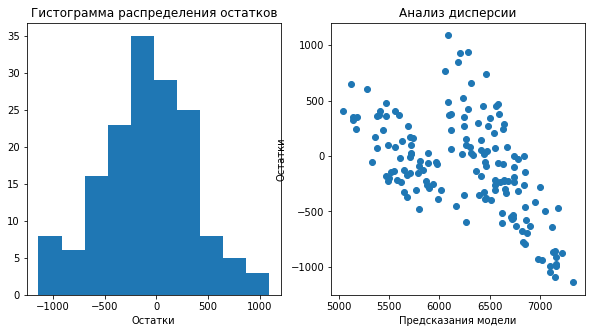

In [42]:
import matplotlib.pyplot as plt

residuals = y_test - predictions

# постройте графики по количественным признакам — гистограмму частотности
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [43]:
#ferma_main[ferma_main['Удой, кг'] < 40000].plot(x='Удой, кг',
                #y='ЭКЕ (Энергетическая кормовая единица)',
                #kind='scatter',
                #grid=True,
                #title = 'Диаграмма рассеяния для величин ЭКЕ и удой')

# 3-ий подпункт

In [58]:
new_ferma_main = pd.merge(ferma_main, ferma_dad, on='id', how='left')

In [59]:
new_ferma_main

,id,"Удой, кг","Сырой протеин, г",Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,СПО (Сахаро-протеиновое соотношение)_бинарный,ЭКЕ в квадрате,Имя Папы
0,1,5863,1743,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,2138,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,1854,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,2012,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,1675,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,1964,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,1,237.16,Буйный
625,626,5513,1700,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,0,166.41,Барин
626,627,5970,1837,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,0,207.36,Барин
627,628,5746,1994,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,0,190.44,Барин


In [60]:
RANDOM_STATE = 42

# считываем CSV-файл в датафрейм pandas
# выделяем в отдельные переменные целевой признак и входные признак
X = new_ferma_main.drop(['Жирность,%', 'Белок,%', 'Вкус молока', 'Удой, кг'], axis=1)
y = new_ferma_main['Удой, кг']

In [61]:
from sklearn.model_selection import train_test_split



# разделите данные на тренировочные и тестовые, зафиксируйте random_state
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=SEED)

In [62]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)
cat_col_names = ['Порода', 'Тип пастбища', 'порода папы_быка', 'Возраст', 'Имя Папы']
# обучите и трансформируйте категориальные признаки из тренировочной выборки
# сделайте это одной командой
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получите от кодировщика список новых столбцов и сохраните в новой переменной
encoder_col_names = encoder.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_col_names = ['ЭКЕ в квадрате', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)_бинарный']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

In [64]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
print("Размерность матрицы обучающей выборки:", X_train.shape)
print("Размерность вектора целевого признака:", y_train.shape)
print("Размерность матрицы тестовой выборки:", X_test.shape)
print("Размерность вектора целевого признака:", y_test.shape)

Размерность матрицы обучающей выборки: (471, 9)
Размерность вектора целевого признака: (471,)
Размерность матрицы тестовой выборки: (158, 9)
Размерность вектора целевого признака: (158,)


In [65]:
# объединение всех преобразованных данных в тренировочный и тестовый датафреймы
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1).reset_index(drop=True)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1).reset_index(drop=True)
print("Размерность матрицы обучающей выборки:", X_train.shape)
print("Размерность вектора обучающей выборки:", y_train.shape)
print("Размерность матрицы тестовой выборки:", X_test.shape)
print("Размерность вектора тестовой выборки:", y_test.shape)
# вывести пять первых строк из тренировочного датафрейма
print(X_train.head(5))

Размерность матрицы обучающей выборки: (471, 15)
Размерность вектора обучающей выборки: (471,)
Размерность матрицы тестовой выборки: (158, 15)
Размерность вектора тестовой выборки: (158,)
   x0_Вис Бик Айдиал  x0_РефлешнСоверинг  x1_Равнинное  x1_Холмистое  \
0                0.0                 1.0           1.0           0.0   
1                1.0                 0.0           1.0           0.0   
2                0.0                 1.0           0.0           1.0   
3                1.0                 0.0           0.0           1.0   
4                1.0                 0.0           1.0           0.0   

   x2_Айдиал  x2_Соверин  x3_более_2_лет  x3_менее_2_лет  x4_Барин  x4_Буйный  \
0        0.0         1.0             1.0             0.0       1.0        0.0   
1        0.0         1.0             1.0             0.0       1.0        0.0   
2        0.0         1.0             1.0             0.0       1.0        0.0   
3        1.0         0.0             1.0             0.

In [66]:
from sklearn.linear_model import LinearRegression

model_lr_3 = LinearRegression()
model_lr_3.fit(X_train, y_train)
model_lr_3

LinearRegression()

In [67]:
from sklearn.metrics import mean_absolute_error

predictions = model_lr_3.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'MAE номер 3 = {mae:.0f}')

MAE номер 3 = 347


In [68]:
from sklearn.metrics import r2_score

# рассчитайте значения R2 для линейной регрессии
r2_lr_3 = r2_score(y_test, predictions)

# выведите полученное значение R2
print("R2 LinearRegression номер 3 =", r2_lr_3)

R2 LinearRegression номер 3 = 0.16363580198272742


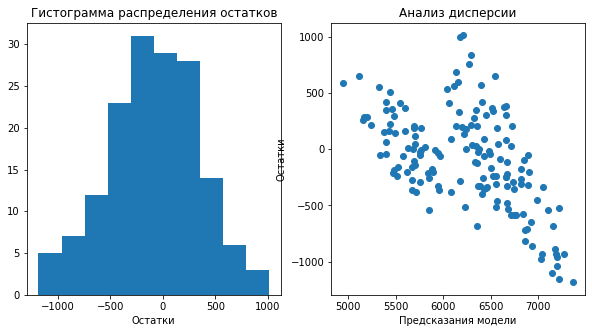

In [69]:
import matplotlib.pyplot as plt

residuals = y_test - predictions

# постройте графики по количественным признакам — гистограмму частотности
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

# Промежуточный выводы

Была проверка на дубликаты и пропуски, больше их нет. Где необходимо были заменен тип данных на float

## Исследовательский анализ данных

Изучим данные удоя у текущего стада

In [ ]:
ferma_main['Удой, кг'].describe()

In [ ]:
ferma_main['Удой, кг'].hist(bins=20)
plt.xlabel('Удой в кг', rotation=45)
plt.ylabel('Количество коров')
plt.title('Распределение удоя')
plt.xticks(rotation=45)
plt.show()
ferma_main.query('`Удой, кг` >= 5000 and `Удой, кг` <= 8000')['Удой, кг'].hist(bins = 20)
plt.xlabel('Удой в кг', rotation=45)
plt.ylabel('Количество коров')
plt.title('Распределение удоя')
plt.xticks(rotation=45)
plt.show()

Как можно увидеть в изначальных данных есть один **ОГРОМНЫЙ** выброс в 45000, распределение надоя без него выглядит гораздо приятнее

Уберем его

In [ ]:
Q1 = ferma_main['Удой, кг'].quantile(0.25) # 25-й процентиль
Q3 = ferma_main['Удой, кг'].quantile(0.75) # 75-й процентиль
IQR = Q3 - Q1 # Межквартильный размах

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Нахождение выбросов
outliers = ferma_main[(ferma_main['Удой, кг'] < lower_bound) | (ferma_main['Удой, кг'] > upper_bound)]

# Удаление выбросов из датафрейма
ferma_main = ferma_main[~ferma_main['Удой, кг'].isin(outliers['Удой, кг'])]

# Вывод обновленного датафрейма
print(ferma_main)

In [ ]:
ferma_main['Удой, кг'].describe()

Ура-ура его больше нет

ЭКЕ (Энергетическая кормовая единица)

In [ ]:
ferma_main['ЭКЕ (Энергетическая кормовая единица)'].describe()

In [ ]:
ferma_main['ЭКЕ (Энергетическая кормовая единица)'].hist(bins=10)
plt.xlabel('ЭКЕ', rotation=45)
plt.ylabel('Количество коров')
plt.title('ЭКЕ (Энергетическая кормовая единица)')
plt.xticks(rotation=45)
plt.show()
ferma_main.query('`ЭКЕ (Энергетическая кормовая единица)` >= 10 and `ЭКЕ (Энергетическая кормовая единица)` <= 17')['ЭКЕ (Энергетическая кормовая единица)'].hist(bins = 10)
plt.xlabel('ЭКЕ', rotation=45)
plt.ylabel('Количество коров')
plt.title('ЭКЕ (Энергетическая кормовая единица)')
plt.xticks(rotation=45)
plt.show()

Наиболее частое ЭКЕ 14,5 - 15,5

Проверим Сырой протеин, г

In [ ]:
ferma_main['Сырой протеин, г'].describe()

In [ ]:
ferma_main['Сырой протеин, г'].hist(bins=10)
plt.xlabel('граммы', rotation=45)
plt.ylabel('Количество коров')
plt.title('Сырой протеин, г')
plt.xticks(rotation=45)
plt.show()
ferma_main.query('`Сырой протеин, г` >= 1600 and `Сырой протеин, г` <= 2300')['Сырой протеин, г'].hist(bins = 10)
plt.xlabel('граммы', rotation=45)
plt.ylabel('Количество коров')
plt.title('Сырой протеин, г')
plt.xticks(rotation=45)
plt.show()

Видим что выбросов нету, а наиболее часто значение встречается от 1660 до 1850г

Проверим СПО (Сахаро-протеиновое соотношение)

In [ ]:
ferma_main['СПО (Сахаро-протеиновое соотношение)'].describe()

In [ ]:
ferma_main['СПО (Сахаро-протеиновое соотношение)'].hist(bins=20)
plt.xlabel('СПО', rotation=45)
plt.ylabel('Количество коров')
plt.title('СПО (Сахаро-протеиновое соотношение)')
plt.xticks(rotation=45)
plt.show()
ferma_main.query('`СПО (Сахаро-протеиновое соотношение)` >= 0.84 and `СПО (Сахаро-протеиновое соотношение)` <= 1')['СПО (Сахаро-протеиновое соотношение)'].hist(bins = 20)
plt.xlabel('СПО', rotation=45)
plt.ylabel('Количество коров')
plt.title('СПО (Сахаро-протеиновое соотношение)')
plt.xticks(rotation=45)
plt.show()

Выбросов нету, наиболее частое значение 0.94

Проверим Жирность в %

In [ ]:
ferma_main['Жирность,%'].describe()

In [ ]:
ferma_main['Жирность,%'].hist(bins=20)
plt.xlabel('%', rotation=45)
plt.ylabel('Количество коров')
plt.title('Жирность в %')
plt.xticks(rotation=45)
plt.show()
ferma_main.query('`Жирность,%` >= 2.5 and `Жирность,%` <= 4')['Жирность,%'].hist(bins = 20)
plt.xlabel('%', rotation=45)
plt.ylabel('Количество коров')
plt.title('Жирность в %')
plt.xticks(rotation=45)
plt.show()

Наиболее часто жирность состовляет 3.75%

Теперь проверим Белок в %

In [ ]:
ferma_main['Белок,%'].describe()

In [ ]:
plt.ylim(3, 3.2)
ferma_main.boxplot('Белок,%')
plt.show()

In [ ]:
ferma_main['Белок,%'].hist(bins=30)
plt.xlabel('%', rotation=45)
plt.ylabel('Количество коров')
plt.title('Белок в %')
plt.xticks(rotation=45)
plt.show()
ferma_main.query('`Белок,%` >= 3 and `Белок,%` <= 3.2')['Белок,%'].hist(bins = 30)
plt.xlabel('%', rotation=45)
plt.ylabel('Количество коров')
plt.title('Белок в %')
plt.xticks(rotation=45)
plt.show()

Наиболее часто встречающееся значение 3.076%

Теперь проверим породу 

In [ ]:
ferma_main['Порода'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

Почти 60% стада это порода Вис Бик Айдал, а всё потому что: 1)Вис Бик Айдиалы являются крупными животными, с взрослыми самцами, достигающими веса около 1200-1400 килограммов. Рефлешн Соверинги имеют более средний размер и вес, с взрослыми самцами, достигающими веса около 900-1000 килограммов.

2) Мышечная масса: Обе породы имеют хорошо развитые мышцы, но Вис Бик Айдиалы обычно имеют более выпуклую и широкую спину, что делает их идеальными для производства высококачественного мяса.

3) Адаптивность: Обе породы обладают хорошей адаптивностью к различным климатическим условиям. Однако, Рефлешн Соверинги изначально происходят из холодных регионов и могут иметь более высокую степень адаптивности к холодным погодным условиям.

Теперь проверим на каких пастбищах чаще выгуливаются

In [ ]:
ferma_main['Тип пастбища'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

Равнинное и Равнинные,наверное, одно и то же. Объединим

In [ ]:
ferma_main['Тип пастбища'] = ferma_main['Тип пастбища'].replace(['Равнинное', 'Равнинные'], 'Равнинное')
ferma_main['Тип пастбища'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

Чаще выгуливаются на холмах

Теперь проверим породу папы быка

In [ ]:
ferma_main['порода папы_быка'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

Внезапно обнаружилась очепятка есть АйдиаЛЛ и АйдиаЛ, наверное их надо объединить в группу

In [ ]:
ferma_main['порода папы_быка'] = ferma_main['порода папы_быка'].replace(['Айдиалл', 'Айдиал'], 'Айдиалл')
ferma_main['порода папы_быка'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

Теперь Соверин не лидирует вовсе, но соотношение практически разное

Теперь самое важное, что же по вкусу?

In [ ]:
ferma_main['Вкус молока'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

Хм....60% ответило вкусно, хотелось бы больше, может это молочный хэйтеры или веганы со своим латте на кокосовомм молоке подъехали?

Теперь посмотрим на возраст

In [ ]:
ferma_main['Возраст'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

Подавляющее большинство это 2+ года. Связано с тем что у нас компания связана с молоком, а не мясом. Их задача максимально долго "выжимать" корову до конца. Поэтому взрослых и больше. Будь это мясное хозяйство соотношение было бы противоположным

Посмотрим на самого популярного быка осеменителя

In [ ]:
ferma_dad['Имя Папы'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

Буйный и Барин, вот это компания. А вместе они страшная сила

Теперь посмотрим на данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой

In [ ]:
cow_buy['Текущая_жирность,%'].describe()

In [ ]:
plt.ylim(3, 3.8)
cow_buy.boxplot('Текущая_жирность,%')
plt.show() 

Выбросов нету

In [ ]:
cow_buy['Текущая_жирность,%'].hist(bins=30)
plt.xlabel('%', rotation=45)
plt.ylabel('Количество коров')
plt.title('Жирность в %')
plt.xticks(rotation=45)
plt.show()

Наиболее частая жирность молока у сторонней фермы это 3.4% и 3.75

Теперь рассмотрим процент белка в молоке

In [ ]:
cow_buy['Текущий_уровень_белок,%'].describe()

In [ ]:
plt.ylim(3, 3.1)
cow_buy.boxplot('Текущий_уровень_белок,%')
plt.show() 

Выбросов нету

In [ ]:
cow_buy['Текущий_уровень_белок,%'].hist(bins=10)
plt.xlabel('%', rotation=45)
plt.ylabel('Количество коров')
plt.title('Белок в %')
plt.xticks(rotation=45)
plt.show()

Чаще всего это значение достигает 3.075-3.08%

Теперь посмотрим какая порода чаще в месте предполагаемой закупки

In [ ]:
cow_buy['Порода'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

Этих пород равное количество

Теперь посмотрим тип пастбища

In [ ]:
cow_buy['Тип пастбища'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

Одинаковое количество

Рассмотрим породу папы быка

In [ ]:
cow_buy['порода папы_быка'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

Наиболее часто это Соверин

Рассмотрим наиболее частое имя счатливого отца

In [ ]:
cow_buy['Имя_папы'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

Наиболее часто это Буйный

# Промежуточный вывод

Проведен статистический анализ всех признаков и построены разные графики для категориальных и количественных признаков. Вот некоторые факты о нашем стаде: Чаще всего встречается возраст 2+ года, порода Вис Бик Айдиал больше, а гуляют чаще по холмистой местности. В ходе работы выбросов не было замечено.

Также стоит уточнить что была найдена опечатка связанная с породой, а именно АйдиаЛЛ и АйдиаЛ, были заменены на АйдиаЛЛ

## Корреляционный анализ

Изучим взаимосвязь между целевым и входными признаками. Целевых признаков у нас 2: удой и вкус молока.

Проверяем на нормальность распредение данный удоя

In [ ]:
ferma_main['Удой, кг'].hist(bins = 20)
plt.xlabel('Удой в кг', rotation=45)
plt.ylabel('Количество коров')
plt.title('Распределение удоя')
plt.xticks(rotation=45)
plt.show()
data_y = ferma_main['Удой, кг']

# Построение QQ-графика
stats.probplot(data_y, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Удой в кг')
plt.title('QQ-график удоя')
plt.show()

In [ ]:
shapiro_test = stats.shapiro(ferma_main['Удой, кг'])


print("Статистика теста Шапиро:", shapiro_test.statistic)
print("p-значение Шапиро:", shapiro_test.pvalue)

Распределение не является нормальным.
Но посоветовавшись с наставником он сказал: Ваша выборка не соответствует критериям нормального распределения согласно проведенному тесту. Однако, так как Q-Q график показывает распределение, близкое к нормальному, то при условии что выборка достаточно большая, можно использовать методы, основанные на нормальном распределении.

У вас также в выборке нет сильной асимметрии или выбросов, что не позволило бы использовать эти методы.

Попробую использовать как нормальное распределение

Теперь рассмотрим распределение ЭКЕ

In [ ]:
ferma_main['ЭКЕ (Энергетическая кормовая единица)'].hist(bins = 20)
plt.xlabel('ЭКЕ', rotation=45)
plt.ylabel('Количество коров')
plt.title('Энергетическая кормовая единица')
plt.xticks(rotation=45)
plt.show()
data = ferma_main['ЭКЕ (Энергетическая кормовая единица)']

# Построение QQ-графика
stats.probplot(data, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Удой в кг')
plt.title('QQ-график удоя')
plt.show()

In [ ]:
shapiro_test = stats.shapiro(ferma_main['ЭКЕ (Энергетическая кормовая единица)'])


print("Статистика теста Шапиро:", shapiro_test.statistic)
print("p-значение Шапиро:", shapiro_test.pvalue)

Распределение ненормальное, но попробую испоользовать как нормальное т.к нет большого количества выбросов и график Q-Q нормальный

Рассмотрим распределение сырого протеина

In [ ]:
ferma_main['Сырой протеин, г'].hist(bins = 20)
plt.xlabel('Сырой протеин, г', rotation=45)
plt.ylabel('Количество коров')
plt.title('Сырой протеин, г')
plt.xticks(rotation=45)
plt.show()
data = ferma_main['Сырой протеин, г']

# Построение QQ-графика
stats.probplot(data, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Сырой протеин в граммах')
plt.title('QQ-график сырого протеина в граммах')
plt.show()

Тут не всё так очевидно, проведем тест Шапиро-Уилка и Колмогорова-Смирнова

In [ ]:
shapiro_test = stats.shapiro(ferma_main['Сырой протеин, г'])


print("Статистика теста Шапиро:", shapiro_test.statistic)
print("p-значение Шапиро:", shapiro_test.pvalue)

р значение меньше 0.05 значит распределение ненормальное, но буду использовать как нормальное основываясь на графике Q-Q

Рассмотрим нормальность СПО

In [ ]:
ferma_main['СПО (Сахаро-протеиновое соотношение)'].hist(bins = 20)
plt.xlabel('%', rotation=45)
plt.ylabel('Количество коров')
plt.title('СПО')
plt.xticks(rotation=45)
plt.show()
data = ferma_main['СПО (Сахаро-протеиновое соотношение)']

# Построение QQ-графика
stats.probplot(data, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('СПО')
plt.title('QQ-график СПО')
plt.show() 
shapiro_test = stats.shapiro(ferma_main['СПО (Сахаро-протеиновое соотношение)'])


print("Статистика теста Шапиро:", shapiro_test.statistic)
print("p-значение Шапиро:", shapiro_test.pvalue)

Распределение ненормальное

Рассмотрим нормальность распределения жирности в %

In [ ]:
ferma_main['Жирность,%'].hist(bins = 20)
plt.xlabel('%', rotation=45)
plt.ylabel('Количество коров')
plt.title('Жирность,%')
plt.xticks(rotation=45)
plt.show()
data = ferma_main['Жирность,%']

# Построение QQ-графика
stats.probplot(data, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Жирность,%')
plt.title('QQ-график жирности в %')
plt.show() 

Похоже что распределение несовсем нормальное...

In [ ]:
shapiro_test = stats.shapiro(ferma_main['Жирность,%'])


print("Статистика теста Шапиро:", shapiro_test.statistic)
print("p-значение Шапиро:", shapiro_test.pvalue)

Распределение ненормальное

Рассмотрим нормальность распределения белка в %

In [ ]:
ferma_main['Белок,%'].hist(bins = 20)
plt.xlabel('%', rotation=45)
plt.ylabel('Количество коров')
plt.title('Белок,%')
plt.xticks(rotation=45)
plt.show()
data = ferma_main['Белок,%']

# Построение QQ-графика
stats.probplot(data, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Белок,%')
plt.title('QQ-график белка в %')
plt.show()
shapiro_test = stats.shapiro(ferma_main['Белок,%'])


print("Статистика теста Шапиро:", shapiro_test.statistic)
print("p-значение Шапиро:", shapiro_test.pvalue)

Всё неоднозначно, статистика теста близка к 1 но значение малое, скорее всего это нормальное распределение с небольшими отклонениями

Рассмотрим данные из датасета cow_buy Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%

Рассмотрим текущую жирность в %

In [ ]:
cow_buy['Текущая_жирность,%'].hist(bins = 20)
plt.xlabel('%', rotation=45)
plt.ylabel('Количество коров')
plt.title('Текущая жирность в %')
plt.xticks(rotation=45)
plt.show()
data = cow_buy['Текущая_жирность,%']

# Построение QQ-графика
stats.probplot(data, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('жирность,%')
plt.title('QQ-график текущей жирности в %')
plt.show()
shapiro_test = stats.shapiro(cow_buy['Текущая_жирность,%'])


print("Статистика теста Шапиро:", shapiro_test.statistic)
print("p-значение Шапиро:", shapiro_test.pvalue)

По данным теста и графика значение можно назвать нормальным

Рассмотрим текущий уровень белка в %

In [ ]:
cow_buy['Текущий_уровень_белок,%'].hist(bins = 20)
plt.xlabel('%', rotation=45)
plt.ylabel('Количество коров')
plt.title('Текущий уровень белка в %')
plt.xticks(rotation=45)
plt.show()
data = cow_buy['Текущий_уровень_белок,%']

# Построение QQ-графика
stats.probplot(data, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('уровень белка в %')
plt.title('QQ-график текущеи уровень белка в %')
plt.show()
shapiro_test = stats.shapiro(cow_buy['Текущий_уровень_белок,%'])


print("Статистика теста Шапиро:", shapiro_test.statistic)
print("p-значение Шапиро:", shapiro_test.pvalue)

Из-за р значения данное распределение не является нормальным

Мы выяснили какие данные нормально распределены а какие нет, теперь начнём строить графики корреляции

### Корелляция по удою

Корелляция между удоем и ЭКЕ 

In [ ]:
ferma_main.plot(x='Удой, кг', y='ЭКЕ (Энергетическая кормовая единица)', kind='scatter', alpha=0.5, grid = True)
plt.title('Корелляция между удоем и ЭКЕ')
plt.xticks(rotation=45)
plt.show()
cor = ferma_main['Удой, кг'].corr(ferma_main['ЭКЕ (Энергетическая кормовая единица)'])
correlation, p_value = stats.pearsonr(ferma_main['Удой, кг'], ferma_main['ЭКЕ (Энергетическая кормовая единица)'])

# Выводим результаты корреляции
print("Коэффициент корреляции Пирсона:", correlation)
print("p-значение:", p_value)
print("Коэффициент корреляции без учета коэф.Пирсона:", cor)


Корелляция сильная

Рассмотрим корелляцию с сырым протеином

In [ ]:
ferma_main.plot(x='Удой, кг', y='Сырой протеин, г', kind='scatter', alpha=0.5, grid = True)
plt.title('Корелляция между удоем и сырым протеином')
plt.xticks(rotation=45)
plt.show()
cor = ferma_main['Удой, кг'].corr(ferma_main['Сырой протеин, г'])
correlation, p_value = stats.pearsonr(ferma_main['Удой, кг'], ferma_main['Сырой протеин, г'])

# Выводим результаты корреляции
print("Коэффициент корреляции Пирсона:", correlation)
print("p-значение:", p_value)
print("Коэффициент корреляции без учета коэф.Пирсона:", cor)


Корелляция слабая

Проверим корелляцию с СПО

In [ ]:
ferma_main.plot(x='Удой, кг', y='СПО (Сахаро-протеиновое соотношение)', kind='scatter', alpha=0.5, grid=True)
plt.title('Корелляция между удоем и СПО')
plt.xticks(rotation=45)
plt.show()

cor = ferma_main['Удой, кг'].corr(ferma_main['СПО (Сахаро-протеиновое соотношение)'])
correlation, p_value = stats.spearmanr(ferma_main['Удой, кг'], ferma_main['СПО (Сахаро-протеиновое соотношение)'])

# Выводим результаты корреляции
print("Коэффициент корреляции Спирмена:", correlation)
print("p-значение:", p_value)

Корелляция сильная

Посмотрим зависимость с породой

In [ ]:
ferma_main['Порода'] = ferma_main['Порода'].astype('category').cat.codes
# Стандартизация числового признака
scaler = StandardScaler()
ferma_main['Порода'] = scaler.fit_transform(ferma_main['Порода'].values.reshape(-1, 1))
ferma_main['Удой, кг'] = scaler.fit_transform(ferma_main['Удой, кг'].values.reshape(-1, 1))
# Построение scatter plot
sns.scatterplot(data=ferma_main, x='Удой, кг', y='Порода', hue=ferma_main['Порода'], legend='full', alpha=0.5)
plt.grid(True)

# Вычисление корреляции Пирсона
corr_pearson = ferma_main['Удой, кг'].corr(ferma_main['Порода'])

# Вычисление корреляции Спирмена
corr_spearman, _ = spearmanr(ferma_main['Удой, кг'], ferma_main['Порода'])

# Вывод значений корреляций
print('Корреляция Пирсона:', corr_pearson)
print('Корреляция Спирмена:', corr_spearman)

Проверим с типом пастбища

In [ ]:
ferma_main['Тип пастбища'] = ferma_main['Тип пастбища'].astype('category').cat.codes
# Стандартизация числового признака
scaler = StandardScaler()
ferma_main['Тип пастбища'] = scaler.fit_transform(ferma_main['Тип пастбища'].values.reshape(-1, 1))
ferma_main['Удой, кг'] = scaler.fit_transform(ferma_main['Удой, кг'].values.reshape(-1, 1))
# Построение scatter plot
sns.scatterplot(data=ferma_main, x='Удой, кг', y='Тип пастбища', hue=ferma_main['Тип пастбища'], alpha=0.5)
plt.grid(True)

# Вычисление корреляции Пирсона
corr_pearson = ferma_main['Удой, кг'].corr(ferma_main['Тип пастбища'])

# Вычисление корреляции Спирмена
corr_spearman, _ = spearmanr(ferma_main['Удой, кг'], ferma_main['Тип пастбища'])

# Вывод значений корреляций
print('Корреляция Пирсона:', corr_pearson)
print('Корреляция Спирмена:', corr_spearman)

Теперь проверим по породе папы быка

In [ ]:
ferma_main['порода папы_быка'] = ferma_main['порода папы_быка'].astype('category').cat.codes
# Стандартизация числового признака
scaler = StandardScaler()
ferma_main['порода папы_быка'] = scaler.fit_transform(ferma_main['порода папы_быка'].values.reshape(-1, 1))
ferma_main['Удой, кг'] = scaler.fit_transform(ferma_main['Удой, кг'].values.reshape(-1, 1))
# Построение scatter plot
sns.scatterplot(data=ferma_main, x='Удой, кг', y='порода папы_быка', alpha=0.5)
plt.grid(True)

# Вычисление корреляции Пирсона
corr_pearson = ferma_main['Удой, кг'].corr(ferma_main['порода папы_быка'])

# Вычисление корреляции Спирмена
corr_spearman, _ = spearmanr(ferma_main['Удой, кг'], ferma_main['порода папы_быка'])

# Вывод значений корреляций
print('Корреляция Пирсона:', corr_pearson)
print('Корреляция Спирмена:', corr_spearman)

Корелляция сильная

Теперь проверим связь с жирностью в % 

In [ ]:
ferma_main.plot(x='Удой, кг', y='Жирность,%', kind='scatter', alpha=0.5, grid=True)
plt.title('Корреляция между удоем и жирностью в %')
plt.xticks(rotation=45)
plt.show()


correlation, p_value = stats.pearsonr(ferma_main['Удой, кг'], ferma_main['Жирность,%'])

# Выводим результаты корреляции

print("Коэффициент корреляции Пирсона:", correlation)
print("p-значение:", p_value)

Корелляция сильная

Сравним с белком в %

In [ ]:
ferma_main.plot(x='Удой, кг', y='Белок,%', kind='scatter', alpha=0.5, grid=True)
plt.title('Корреляция между удоем и белком в %')
plt.xticks(rotation=45)
plt.show()


correlation, p_value = stats.spearmanr(ferma_main['Удой, кг'], ferma_main['Белок,%'])

# Выводим результаты корреляции

print("Коэффициент корреляции Спирмена:", correlation)
print("p-значение:", p_value)

Корелляции нет

Проверим корелляцию с вкусом молока

In [ ]:
ferma_main['Вкус молока'] = ferma_main['Вкус молока'].astype('category').cat.codes

# Стандартизация числовых признаков
scaler = StandardScaler()
ferma_main['Вкус молока'] = scaler.fit_transform(ferma_main['Вкус молока'].values.reshape(-1, 1))
ferma_main['Удой, кг'] = scaler.fit_transform(ferma_main['Удой, кг'].values.reshape(-1, 1))

# Построение scatter plot с hue
sns.scatterplot(data=ferma_main, x='Удой, кг', y='Вкус молока', hue=ferma_main['Вкус молока'], legend='full', alpha=0.5)
plt.grid(True)

# Вычисление корреляции Пирсона
corr_pearson = ferma_main['Удой, кг'].corr(ferma_main['Вкус молока'])

# Вычисление корреляции Спирмена
corr_spearman, _ = spearmanr(ferma_main['Удой, кг'], ferma_main['Вкус молока'])

# Вывод значений корреляций
print('Корреляция Пирсона:', corr_pearson)
print('Корреляция Спирмена:', corr_spearman)

In [ ]:
print(ferma_main['Вкус молока'].dtypes)

In [ ]:
print(ferma_main['Вкус молока'].head())

Корелляция очень слабая, даже отрицательная

Сравним с возрастом 

In [ ]:
ferma_main['Возраст'] = ferma_main['Возраст'].astype('category').cat.codes
# Стандартизация числового признака
scaler = StandardScaler()
ferma_main['Возраст'] = scaler.fit_transform(ferma_main['Возраст'].values.reshape(-1, 1))
ferma_main['Удой, кг'] = scaler.fit_transform(ferma_main['Удой, кг'].values.reshape(-1, 1))
# Построение scatter plot
sns.scatterplot(data=ferma_main, x='Удой, кг', y='Возраст', hue=ferma_main['Возраст'], legend='full',  alpha=0.5)
plt.grid(True)

# Вычисление корреляции Пирсона
corr_pearson = ferma_main['Удой, кг'].corr(ferma_main['Возраст'])

# Вычисление корреляции Спирмена
corr_spearman, _ = spearmanr(ferma_main['Удой, кг'], ferma_main['Возраст'])

# Вывод значений корреляций
print('Корреляция Пирсона:', corr_pearson)
print('Корреляция Спирмена:', corr_spearman)

Корелляция сильная и отрицательная

Так же можно применить такой метод

In [ ]:
column_to_compare = 'Удой, кг'

# Создание матрицы корреляции
corr_matrix = ferma_main.corr()

# Создание подматрицы, сравнивающей выбранный столбец с остальными
subset_corr_matrix = corr_matrix[['Удой, кг']]

# Визуализация матрицы корреляции в виде тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(subset_corr_matrix, annot=True, cmap="YlGnBu")
plt.title('Матрица корреляции сравнивающая датасет с ' + column_to_compare)
plt.show()

Тут сразу видна мультиколлинеарная зависимость с породой, вкусом молока и возрастом

Скучно и в цифровом виде можно отразить вот так

In [ ]:
corr_matrix = ferma_main.corr()
print(corr_matrix)

### Корелляция по вкусу молока

In [ ]:
column_to_compare = 'Вкус молока'

# Создание матрицы корреляции
corr_matrix = ferma_main.corr()

# Создание подматрицы, сравнивающей выбранный столбец с остальными
subset_corr_matrix = corr_matrix[['Вкус молока']]

# Визуализация матрицы корреляции в виде тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(subset_corr_matrix, annot=True, cmap="YlGnBu")
plt.title('Матрица корреляции сравнивающая датасет с ' + column_to_compare)
plt.show()

Видна мультиколлинеарная зависимость с Удоем в кг, вкусом молока, породой

# Промежуточные выводы

## Обучение модели линейной регрессии

Для начала нам необходимо выбрать признаки которые будут подходить для модели (используем в качестве целевого признак Удой). Я возьму ЭКЕ, СПО, сырой протеин в корме. Также попробуем взять породу коров и породу папы быка, может быть связано качество молока с генетическим фактором. А параметры корма берем по причине того что питание напрямую будет влиять на исходный продукт, так сказать shit in, shit out

Разделим выборку

In [ ]:
RANDOM_STATE = 42

# считываем CSV-файл в датафрейм pandas
# выделяем в отдельные переменные целевой признак и входные признак
X = ferma_main.drop(['Жирность,%', 'Белок,%', 'Вкус молока', 'Удой, кг'], axis=1)
y = ferma_main['Удой, кг']

# разделите данные на тренировочные и тестовые, зафиксируйте random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

In [ ]:
print("Размерность матрицы обучающей выборки:", X_train.shape)
print("Размерность вектора обучающей выборки:", y_train.shape)
print("Размерность матрицы тестовой выборки:", X_test.shape)
print("Размерность вектора тестовой выборки:", y_test.shape)
print(X_train.head(5))

In [ ]:
#cat_col_names = ['Порода', 'порода папы_быка']

# применяем метод pd.get_dummies() для кодирования категориальных признаков
#X_train_ohe = pd.get_dummies(X_train[cat_col_names], drop_first=False)
#X_test_ohe = pd.get_dummies(X_test[cat_col_names], drop_first=False)

# объединяем закодированные данные с исходными датафреймами
#X_train_ohe = pd.concat([X_train, X_train_ohe], axis=1)
#X_test_ohe = pd.concat([X_test, X_test_ohe], axis=1)

In [ ]:
encoder = OneHotEncoder(sparse = False)
cat_col_names = ['Порода', 'Тип пастбища','порода папы_быка','Возраст']
# обучите и трансформируйте категориальные признаки из тренировочной выборки
# сделайте это одной командой
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получите от кодировщика список новых столбцов и сохраните в новой переменной
encoder_col_names = encoder.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [ ]:
print("Размерность матрицы обучающей выборки:", X_train.shape)
print("Размерность вектора обучающей выборки:", y_train.shape)
print("Размерность матрицы тестовой выборки:", X_test.shape)
print("Размерность вектора тестовой выборки:", y_test.shape)
print(X_train.head(5))

# У меня почему-то получаются значения для выборок  471 и 157, а колабе 475 и 159 и МАЕ = 0, а R = 0,82

In [ ]:
scaler = StandardScaler()
num_col_names = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
print("Размерность матрицы обучающей выборки:", X_train.shape)
print("Размерность вектора обучающей выборки:", y_train.shape)
print("Размерность матрицы тестовой выборки:", X_test.shape)
print("Размерность вектора тестовой выборки:", y_test.shape)
X_train_ohe.shape, X_test_ohe.shape


In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
print("Размерность матрицы обучающей выборки:", X_train.shape)
print("Размерность вектора обучающей выборки:", y_train.shape)
print("Размерность матрицы тестовой выборки:", X_test.shape)
print("Размерность вектора тестовой выборки:", y_test.shape)

In [ ]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1).reset_index(drop=True)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1).reset_index(drop=True)

In [ ]:
print(X_train.head(5))
print("Размерность матрицы обучающей выборки:", X_train.shape)
print("Размерность вектора обучающей выборки:", y_train.shape)
print("Размерность матрицы тестовой выборки:", X_test.shape)
print("Размерность вектора тестовой выборки:", y_test.shape)

In [ ]:
# объединение всех преобразованных данных в тренировочный и тестовый датафреймы
#X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1).reset_index(drop=True)
#X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1).reset_index(drop=True)
print("Размерность матрицы обучающей выборки:", X_train.shape)
print("Размерность вектора обучающей выборки:", y_train.shape)
print("Размерность матрицы тестовой выборки:", X_test.shape)
print("Размерность вектора тестовой выборки:", y_test.shape)
# вывести пять первых строк из тренировочного датафрейма
print(X_train.head(5))

In [ ]:
print("Размерность матрицы обучающей выборки:", X_train.shape)
print("Размерность вектора обучающей выборки:", y_train.shape)
print("Размерность матрицы тестовой выборки:", X_test.shape)
print("Размерность вектора тестовой выборки:", y_test.shape)

In [ ]:
#X_train = X_train.dropna()
#y_train = y_train.dropna()
#X_test = X_test.dropna()
#y_test = y_test.dropna()
#X_train = X_train.fillna(0)
#X_test = X_test.fillna(0)

In [ ]:
print(X_train.head(5))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [ ]:
print("Размерность матрицы обучающей выборки:", X_train.shape)
print("Размерность вектора обучающей выборки:", y_train.shape)
print("Размерность матрицы тестовой выборки:", X_test.shape)
print("Размерность вектора тестовой выборки:", y_test.shape)

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'MAE = {mae:.0f}')

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
X_test

In [ ]:
predictions

In [ ]:
# обучаем модель линейной регрессии и получаем предсказания
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

# рассчитайте значения R2 для линейной регрессии
r2_lr = r2_score(y_test, predictions)

# выведите полученное значение R2
print("R2 LinearRegression =", r2_lr)

Проведем анализ остатков

In [ ]:
residuals = y_test - predictions

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [ ]:
encoder = OneHotEncoder(sparse = False) 
cat_col_names = ['СПО (Сахаро-протеиновое соотношение)']
# обучите и трансформируйте категориальные признаки из тренировочной выборки 
# сделайте это одной командой
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names = encoder.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

Найдем границу нелинейности

In [ ]:
ferma_main[ferma_main['Удой, кг'] < 40000].plot(x='Удой, кг',
                y='СПО (Сахаро-протеиновое соотношение)',
                kind='scatter',
                grid=True,
                title = 'Диаграмма рассеяния для величин СПО и удой')

Получается 0,91

In [ ]:
ferma_main[ferma_main['СПО (Сахаро-протеиновое соотношение)'] < 0.91]

In [ ]:
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train, y_train)
model_lr_2

# Что-то непонятное и врядли правильное

In [ ]:
scaler = StandardScaler()
num_col_names = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [ ]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'MAE = {mae:.0f}')

In [ ]:
# обучаем модель линейной регрессии и получаем предсказания
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

# рассчитайте значения R2 для линейной регрессии
r2_lr = r2_score(y_test, predictions)

# выведите полученное значение R2
print("R2 LinearRegression =", r2_lr)

Анализ остатков

In [ ]:
residuals = y_test - predictions

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Сделай то же самое по образу и подобию с ЭКЕ**

In [ ]:
encoder = OneHotEncoder(sparse = False) 
cat_col_names = ['ЭКЕ (Энергетическая кормовая единица)']
# обучите и трансформируйте категориальные признаки из тренировочной выборки 
# сделайте это одной командой
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names = encoder.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [ ]:
scaler = StandardScaler()
num_col_names = ['СПО (Сахаро-протеиновое соотношение)', 'Сырой протеин, г']
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [ ]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'MAE = {mae:.0f}')

In [ ]:
# обучаем модель линейной регрессии и получаем предсказания
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

# рассчитайте значения R2 для линейной регрессии
r2_lr = r2_score(y_test, predictions)

# выведите полученное значение R2
print("R2 LinearRegression =", r2_lr)

In [ ]:
residuals = y_test - predictions

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [ ]:
# стандартизация числовых признаков
scaler = StandardScaler()
num_col_names = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)']

X_train[num_col_names] = scaler.fit_transform(X_train[num_col_names].copy())
X_test[num_col_names] = scaler.transform(X_test[num_col_names].copy())
X_train_scaled = pd.DataFrame(X_train[num_col_names].copy(), columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test[num_col_names].copy(), columns=num_col_names)







X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [ ]:
# 73 cтрочка
encoder = OneHotEncoder(sparse = False) 
cat_col_names = ['Порода', 'порода папы_быка']
# обучите и трансформируйте категориальные признаки из тренировочной выборки 
# сделайте это одной командой
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names = encoder.get_feature_names()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

## Обучение модели логистической регрессии

## Итоговые выводы